<a href="https://colab.research.google.com/github/Pablo7776/Clasificador-zonas-seg-n-el-peligro/blob/main/crimenesPablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"> Laboratorio: </div>
##<div align="center">Clasificador de Zonas según el Peligro</div>

*******************************************************************************************************************************************************************

###Autores:
####Pablo Durán
####Ezequiel Flores

*****************************************************************************************************************************************************************

En el laboratorio, nos centraremos en un conjunto de datos que incluye registros de
crímenes de 1973 en distintos estados de EE. UU., así como el porcentaje de la población
que reside en zonas urbanas en esos estados. El propósito es clasificar los estados en
diferentes categorías basadas en estos factores.


Conjunto de datos

Crímenes

● Asesinatos: La tasa de asesinatos, que se suele calcular como el número de
asesinatos por cada 100,000 habitantes en el estado.

● Asaltos: La tasa de asaltos, que también se calcula por cada 100,000 habitantes.Esto incluiría casos de ataques violentos, incluyendo agresiones físicas.

● Población Urbana: El porcentaje de la población que vive en áreas urbanas del
estado. Un número más alto indica una mayor concentración de población en las
ciudades.

● Violaciónes: La tasa de violaciones, similarmente calculada por cada 100,000
habitantes. Representa la incidencia de este tipo de crimen en el estado

****************************************************************************************************************************************************************

Tarea a desarrollar

Se debe desarrollar un programa que permita clasificar los estados en diferentes categorías,
dividiéndolos en zonas de baja peligrosidad y alta peligrosidad. Este proyecto debe ser
ejecutado en un Notebook de Colab.
No es necesario aplicar múltiples modelos de clustering, ¡con aplicar uno de ellos está más
que bien!
Dentro del Notebook, es importante que cada paso del proceso esté acompañado por
bloques de texto que expliquen el razonamiento detrás de las decisiones tomadas. Se debe
detallar por qué se eligieron ciertas técnicas, métodos o parámetros y cuál es su relevancia
en el contexto del proyecto. Además, es necesario documentar los desafíos o
inconvenientes que surgieron durante el desarrollo, proporcionando una visión clara y
completa del proceso de diseño e implementación de la solución

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Crimenes.csv'

# Lee el archivo CSV
df = pd.read_csv(ruta_del_archivo)

# Muestra las primeras filas del DataFrame
print(df.head())

       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0     Alabama        13.2      236                58         21.2
1      Alaska        10.0      263                48         44.5
2     Arizona         8.1      294                80         31.0
3    Arkansas         8.8      190                50         19.5
4  California         9.0      276                91         40.6


In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


**************************************************************************************************************************************************************************************************************************************************************************************************
analisis exploratorio

**************************************************************************************************************************************************************************************************************************************************************************************************


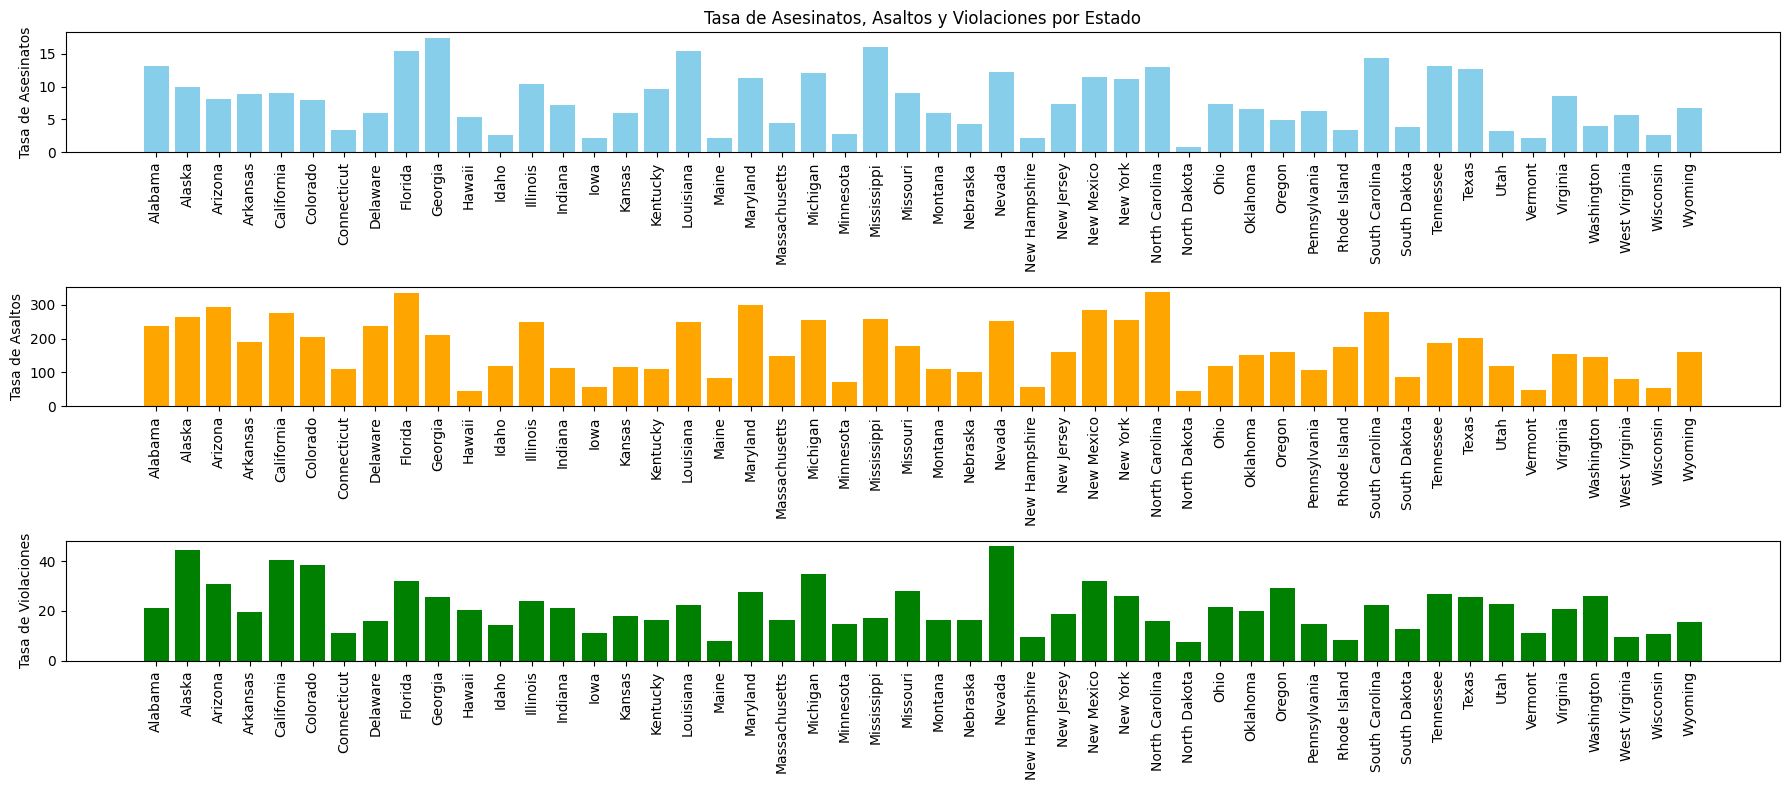

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos relevantes
estados = df['Estado']
asesinatos = df['Asesinatos']
asaltos = df['Asaltos']
violaciones = df['Violaciones']

# Crear subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 8))

# Primer gráfico de barras (Tasa de Asesinatos)
ax1.bar(estados, asesinatos, color='skyblue')
ax1.set_ylabel('Tasa de Asesinatos')
ax1.set_title('Tasa de Asesinatos, Asaltos y Violaciones por Estado')
ax1.tick_params(axis='x', rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad

# Segundo gráfico de barras (Tasa de Asaltos)
ax2.bar(estados, asaltos, color='orange')
ax2.set_ylabel('Tasa de Asaltos')
ax2.tick_params(axis='x', rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad

# Tercer gráfico de barras (Tasa de Violaciones)
ax3.bar(estados, violaciones, color='green')
ax3.set_ylabel('Tasa de Violaciones')
ax3.tick_params(axis='x', rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad

# Ajustar diseño y mostrar el gráfico combinado
plt.tight_layout()
plt.show()

In [ ]:
#df

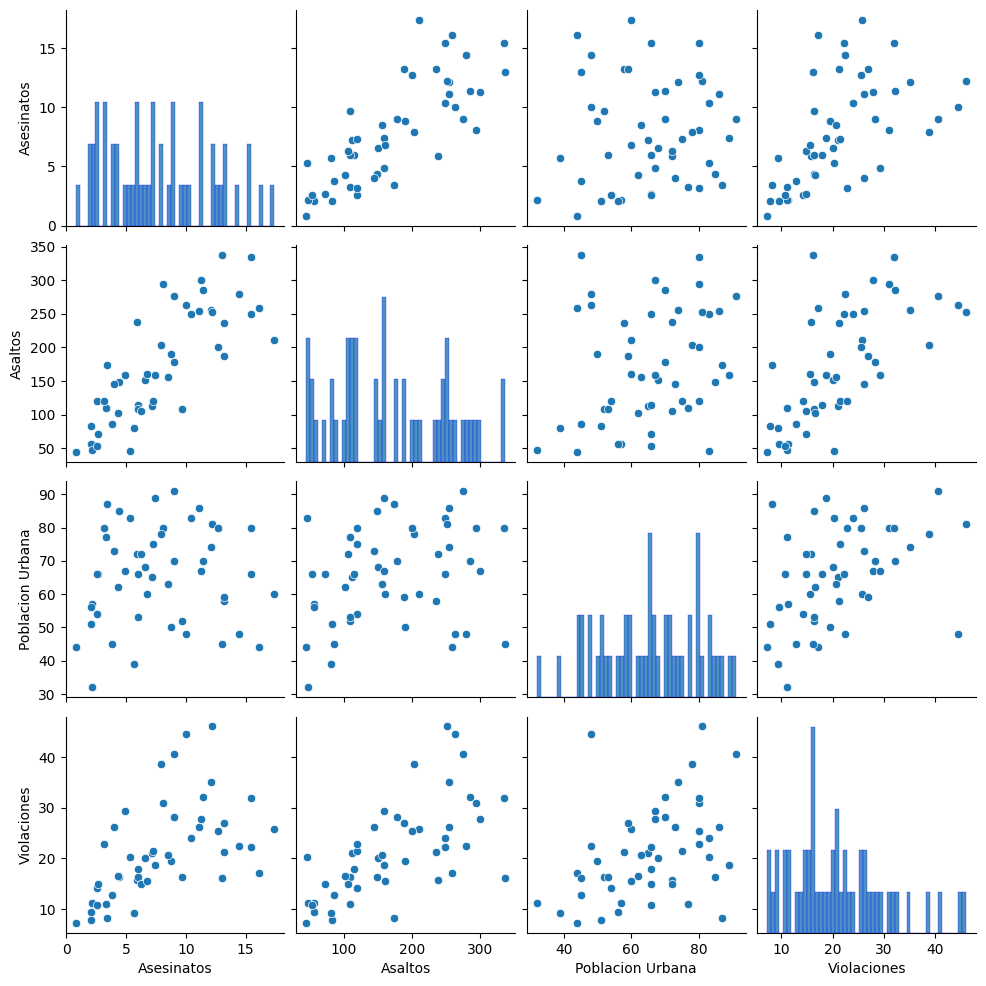

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el número de bins y otros parámetros para los histogramas
hist_kws = {'alpha': 0.8, 'edgecolor': 'blue', 'linewidth': 0.2, 'bins': 50}

# Crear pairplot con ajustes personalizados para los histogramas
sns.pairplot(df, diag_kws=hist_kws)
plt.show()

sns.pairplot(df) es una función de la biblioteca Seaborn que crea una matriz de gráficos de dispersión para todas las combinaciones de variables numéricas en un DataFrame df. Cada gráfico de dispersión muestra la relación entre dos variables y, en la diagonal principal, muestra un histograma para cada variable.


Gráficos de dispersión (Scatter Plots): Cada cuadro fuera de la diagonal principal muestra un gráfico de dispersión que compara dos variables. La posición del punto en el gráfico indica los valores de esas dos variables para una observación particular. Esto permite visualizar relaciones potenciales entre pares de variables.

Histogramas: En la diagonal principal, en lugar de gráficos de dispersión, se muestran histogramas para cada variable. Los histogramas muestran la distribución de valores para cada variable individual.

Matriz de Gráficos: La función pairplot crea una matriz de gráficos, donde las filas y columnas representan las variables en el DataFrame. Cada celda en la matriz contiene un gráfico de dispersión para la combinación de las variables correspondientes.

El código plt.show() simplemente muestra la visualización en la pantalla después de que se ha creado.

Este tipo de visualización es útil para explorar patrones y relaciones entre variables en un conjunto de datos, especialmente cuando hay varias variables numéricas. Al observar los gráficos de dispersión, puedes identificar visualmente correlaciones, patrones lineales o no lineales, y tener una visión general de la distribución de cada variable.

Histogramas en la Diagonal Principal:

En la diagonal principal de la matriz, en lugar de gráficos de dispersión, se muestran histogramas para cada variable numérica en el DataFrame. Cada histograma representa la distribución univariada de una variable en particular.

In [ ]:
#df

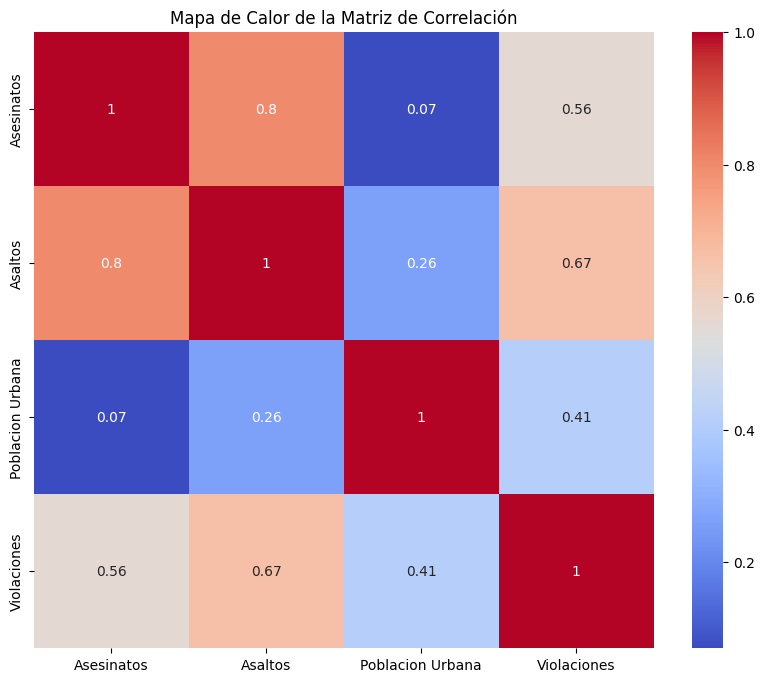

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar columnas no numéricas (por ejemplo, 'Estado')
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Crear mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


En una matriz de correlación, los datos que no están relacionados o tienen baja correlación entre sí también son importantes. La correlación mide la fuerza y la dirección de una relación lineal entre dos variables. Aquí hay algunas razones por las cuales los datos con baja correlación son significativos:

Independencia de Variables: Si dos variables tienen una correlación cercana a cero, sugiere que son independientes entre sí. La independencia entre variables es crucial en muchos análisis estadísticos y modelos, ya que asumir la independencia puede simplificar los cálculos y las interpretaciones.

Multicolinealidad: En análisis de regresión y modelado predictivo, la multicolinealidad (alta correlación entre predictoras) puede ser problemática. Si dos variables están altamente correlacionadas, pueden proporcionar información redundante al modelo. Identificar estas relaciones puede ser importante para evitar problemas de multicolinealidad.

Identificación de Patrones Complejos: A veces, la falta de correlación en una matriz también puede ser informativa. Indica que las variables no siguen una relación lineal simple. Pueden existir patrones más complejos o no lineales que pueden requerir métodos de modelado más avanzados para ser capturados.

Contexto del Problema: En algunos casos, aunque dos variables no tengan una correlación lineal significativa, pueden estar relacionadas de manera no lineal o a través de relaciones más complejas. Dependiendo del contexto del problema, estas relaciones no lineales también pueden ser importantes.

****************************************************************************************************************************************************************
normalización de datos
****************************************************************************************************************************************************************

 La normalización ayuda a que todas las características tengan un rango similar, evitando que características con valores más grandes dominen el proceso de clustering.

En el caso de los algoritmos de clustering, como K-Means, que utilizan distancias entre puntos, la normalización es especialmente importante. Sin normalización, las características con magnitudes más grandes podrían influir desproporcionadamente en el cálculo de distancias y afectar el resultado del clustering.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el clustering
features = ['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']

# Normalizar los datos utilizando StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


La decisión de asignar mayor peso a una característica específica, como los asesinatos en este caso, depende del enfoque clasificatorio y del problema que se esté abordando. Consideramos que un asesinato debe tener un peso mayor en el modelo que un asalto; sin embargo, los pesos asignados son funcionales para la investigación, pero también son en gran medida subjetivos.

En este caso, decidimos asignarle un peso bajo a la población urbana (densidad urbana) ya que pretendemos medir la inseguridad y no la "sensación de inseguridad". No obstante, no eliminamos el parámetro, ya que vivir rodeado de una gran cantidad de criminalidad puede aumentarla: "la violencia genera más violencia".

In [ ]:
# Asignar un peso mayor a la columna de Asesinatos
peso_asesinatos = 6 # Puedes ajustar este valor según tu preferencia
peso_violaciones = 3
peso_asaltos = 1
peso_Poblacion_Urbana = 0.5

# Aplicar el peso a la columna de Asesinatos
df['Asesinatos'] *= peso_asesinatos
df['Violaciones'] *= peso_violaciones
df['Asaltos'] *= peso_asaltos
df['Poblacion Urbana'] *= peso_Poblacion_Urbana

In [ ]:
#df

**************************************************************************************************************************************************************************************************************************************************************************************************
Clustering y reconocimiento de patrones
**************************************************************************************************************************************************************************************************************************************************************************************************

encontrar el número óptimo de clusters para aplicar el algoritmo de K-Means a un conjunto de datos

In [ ]:
pip install kneed

In [ ]:
#df

In [ ]:
#df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

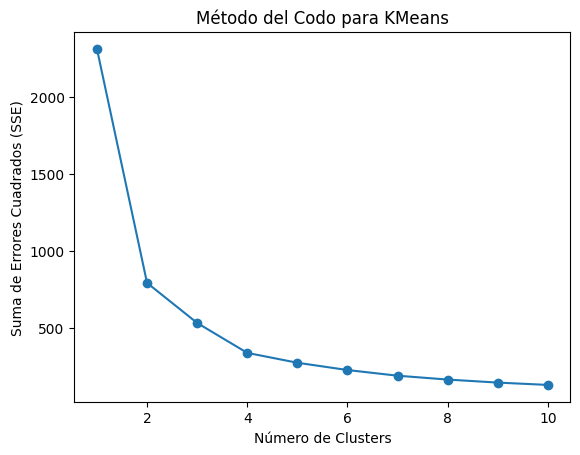

Número óptimo de clusters: 3


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator

def find_optimal_clusters_kmeans(df, max_k):
    sse = [] # Suma de errores cuadrados
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k).fit(df)
        sse.append(kmeans.inertia_)

    # Graficar el método del codo
    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Número de Clusters")
    plt.ylabel("Suma de Errores Cuadrados (SSE)")
    plt.title("Método del Codo para KMeans")
    plt.show()

    # Encontrar el codo (elbow) en la gráfica
    elbow = KneeLocator(range(1, max_k+1), sse, curve='convex', direction='decreasing')

    return elbow.elbow

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']] #, 'Poblacion Urbana'

# Obtener el número óptimo de clusters
optimal_clusters = find_optimal_clusters_kmeans(numeric_columns, 10)

print(f"Número óptimo de clusters: {optimal_clusters}")

In [ ]:
#df



K-Means es un algoritmo de agrupamiento (clustering) que ofrece varias ventajas:

Eficiencia: K-Means es computacionalmente eficiente y puede manejar grandes conjuntos de datos. Es especialmente útil cuando se trabaja con grandes volúmenes de datos.

Facilidad de implementación: Es fácil de entender e implementar. La simplicidad del algoritmo es una de sus principales ventajas. Es adecuado para usuarios que buscan un enfoque práctico y rápido para agrupar datos.

Versatilidad: Se puede utilizar en una variedad de aplicaciones y es adecuado para diferentes tipos de datos. Además, es escalable y puede manejar datos multidimensionales.

Robustez: K-Means puede ser robusto frente a ruido y outliers, aunque su rendimiento puede disminuir en presencia de datos atípicos significativos.

Interpretación clara de los resultados: Los resultados del clustering producidos por K-Means son fáciles de interpretar. Cada cluster tiene un centroide que puede representar de manera eficiente el conjunto de datos en ese grupo.

Requiere pocos parámetros: K-Means requiere la especificación del número de clusters (K), que suele ser un parámetro fácil de determinar, especialmente cuando hay conocimiento previo sobre la naturaleza de los datos.

Alto rendimiento en datos bien estructurados: K-Means funciona bien cuando los datos tienen una estructura clara y los clusters son de forma esférica. Es particularmente eficaz cuando los clusters tienen una forma geométrica simple.



***************************************************************************************************************************************************************


Después de realizar una previsualización de los datos, nos dimos cuenta de la ausencia de clusters con forma esférica. Por lo tanto, no fue necesario utilizar otros modelos clasificatorios.

****************************************************************************************************************************************************************

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Seleccionar las características que se utilizarán para el clustering
X = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

# Crear el modelo K-Means con un número específico de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenar el modelo
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_

# Calcular el centroide de cada cluster
centroides = kmeans.cluster_centers_

# Crear un DataFrame con los centroides y etiquetas de los clusters
centroides_df = pd.DataFrame(centroides, columns=['Asesinatos', 'Asaltos','Poblacion Urbana', 'Violaciones']) #, 'Poblacion Urbana'
centroides_df['Cluster'] = range(len(centroides_df))

# Agregar la columna 'Cluster' al DataFrame original
df['Cluster'] = labels



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
centroides_df

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster
0,-0.733193,-0.127731,0.143994,0.435421,0
1,-6.540987,-0.932696,-0.162779,-2.614900,1
2,7.365829,1.076393,0.000785,2.125051,2


Poder asignar una etiqueta a cada centroide nos resultó un proceso realmente desafiante. En este caso concreto, donde hay poca dimensionalidad y pocos centroides, utilizamos una sumatoria de los valores de cada centroide para luego poder visualizar en el gráfico tridimensional que se encuentra más abajo. En casos más complejos, esta práctica sería infructuosa.

In [ ]:
# Obtener los centroides del modelo K-Means
centroides = kmeans.cluster_centers_

# Crear un DataFrame con los centroides y etiquetas de los clusters
centroides_df = pd.DataFrame(centroides, columns=['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones'])
centroides_df['Cluster'] = range(len(centroides_df))

# Calcular la sumatoria de las columnas relevantes para cada centroide
centroides_df['Suma'] = centroides_df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']].sum(axis=1)

# Crear una función para asignar etiquetas de peligrosidad
def asignar_etiqueta(cluster):
    if cluster == centroides_df.loc[centroides_df['Suma'].idxmax(), 'Cluster']:
        return 'Peligrosidad Alta'
    elif cluster == centroides_df.loc[centroides_df['Suma'].idxmin(), 'Cluster']:
        return 'Peligrosidad Baja'
    else:
        return 'Peligrosidad Media'

# Agregar una columna al DataFrame original con la etiqueta de peligrosidad
df['Peligrosidad'] = df['Cluster'].apply(asignar_etiqueta)


In [ ]:
centroides


array([[-7.33192917e-01, -1.27730523e-01,  1.43994161e-01,
         4.35421216e-01],
       [-6.54098688e+00, -9.32696120e-01, -1.62778537e-01,
        -2.61489997e+00],
       [ 7.36582891e+00,  1.07639296e+00,  7.85105484e-04,
         2.12505110e+00]])

In [ ]:
centroides_df

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Suma
0,-0.733193,-0.127731,0.143994,0.435421,0,-0.281508
1,-6.540987,-0.932696,-0.162779,-2.614900,1,-10.251362
2,7.365829,1.076393,0.000785,2.125051,2,10.568058


In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Peligrosidad
0,Alabama,7.531076,0.790787,-0.263098,-0.010353,2,Peligrosidad Alta
1,Alaska,3.078111,1.118060,-0.612033,7.528272,2,Peligrosidad Alta
2,Arizona,0.434164,1.493817,0.504561,3.160399,0,Peligrosidad Media
3,Arkansas,1.408250,0.233212,-0.542246,-0.560382,0,Peligrosidad Media
4,California,1.686560,1.275635,0.888390,6.266442,0,Peligrosidad Media
5,Colorado,0.155854,0.402909,0.434774,5.651704,0,Peligrosidad Media
6,Connecticut,-6.245282,-0.736484,0.399880,-3.278170,1,Peligrosidad Baja
7,Delaware,-2.627249,0.815030,0.225413,-1.757503,0,Peligrosidad Media
8,Florida,10.592488,1.990786,0.504561,3.451590,2,Peligrosidad Alta
9,Georgia,13.375591,0.487757,-0.193310,1.477959,2,Peligrosidad Alta


Visualización básica de los tres centroides junto a la relación entre dos variables.

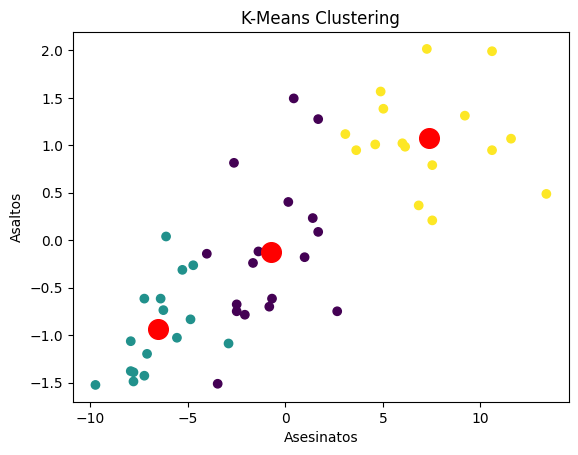

In [ ]:
# Visualizar los resultados
plt.scatter(df['Asesinatos'], df['Asaltos'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label="Centroids") #mostrar centroides
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.title('K-Means Clustering')
plt.show()

Puntos de dispersión (Swarm plot): Agrega puntos de dispersión sobre el boxplot para mostrar la distribución de los datos individuales. Esto puede dar una mejor idea de la dispersión de los datos en cada cluster.

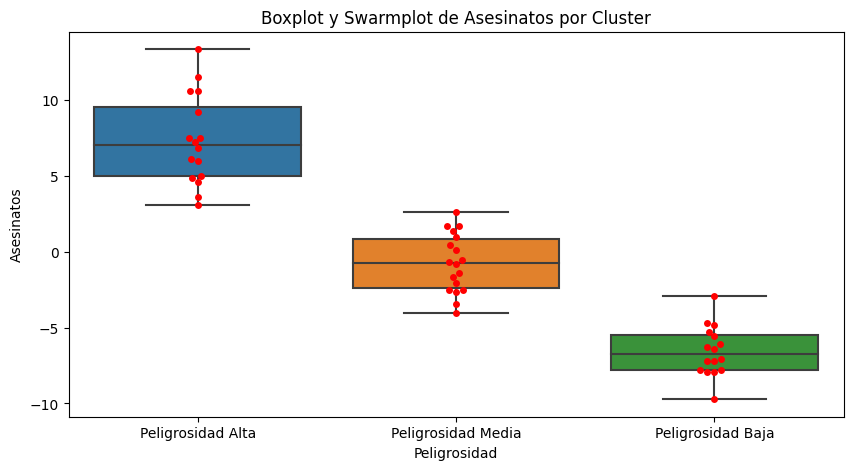

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="Peligrosidad", y="Asesinatos", data=df)
sns.swarmplot(x="Peligrosidad", y="Asesinatos", data=df, color="red")
plt.title('Boxplot y Swarmplot de Asesinatos por Cluster')
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# sns.boxplot(x="Cluster", y="Asesinatos", data=df)
# sns.swarmplot(x="Cluster", y="Asesinatos", data=df, color="red")
# plt.title('Boxplot y Swarmplot de Asesinatos por Cluster')
# plt.show()

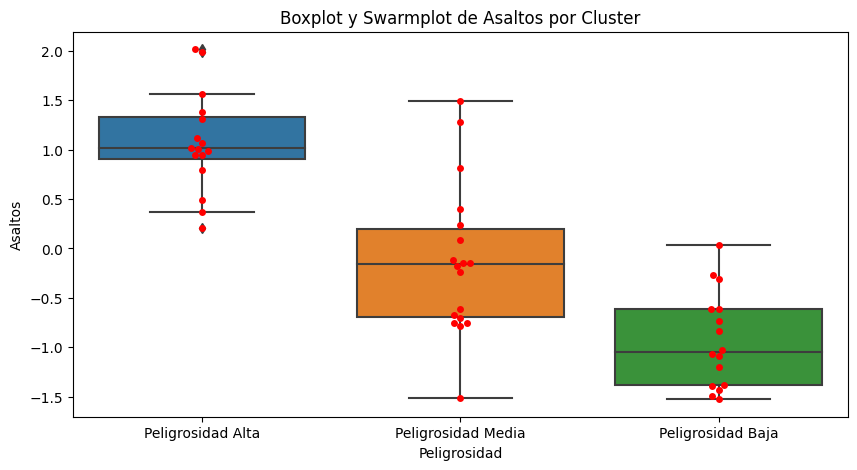

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="Peligrosidad", y="Asaltos", data=df)
sns.swarmplot(x="Peligrosidad", y="Asaltos", data=df, color="red")
plt.title('Boxplot y Swarmplot de Asaltos por Cluster')
plt.show()

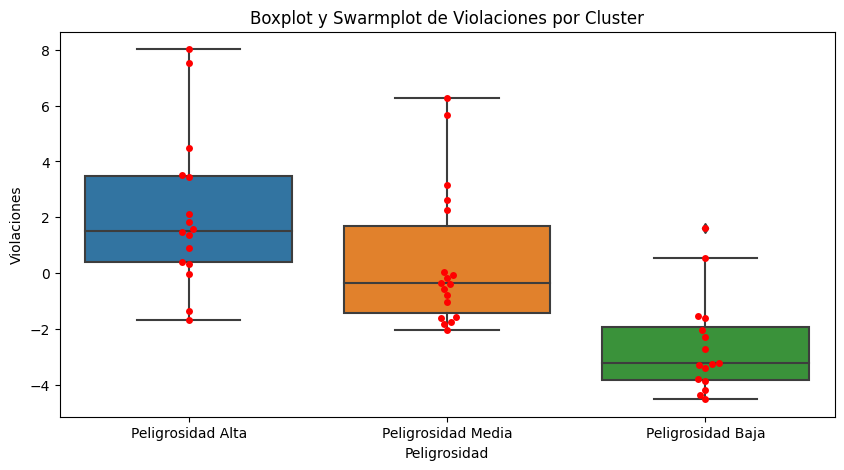

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x="Peligrosidad", y="Violaciones", data=df)
sns.swarmplot(x="Peligrosidad", y="Violaciones", data=df, color="red")
plt.title('Boxplot y Swarmplot de Violaciones por Cluster')
plt.show()


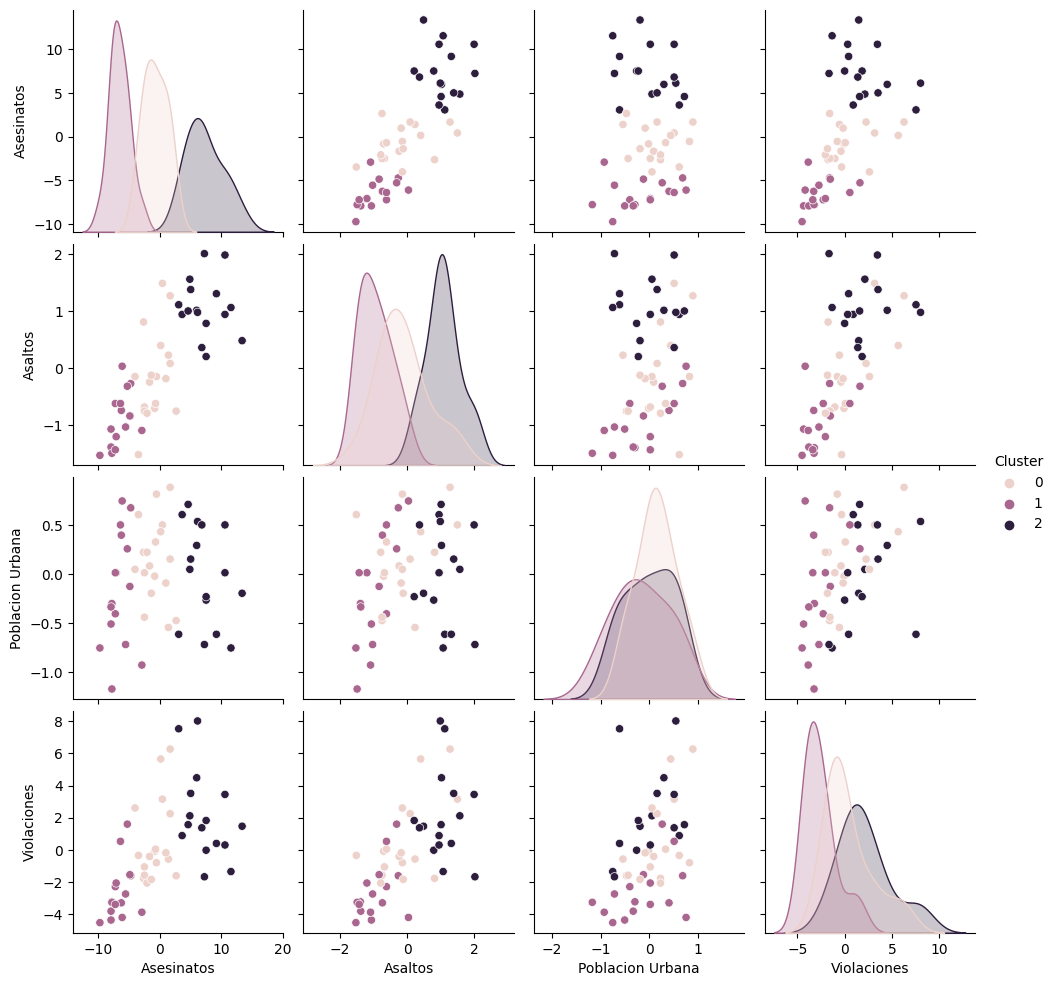

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Visualizar los resultados
sns.pairplot(df, hue='Cluster')
plt.show()

In [ ]:
import numpy as np

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Escalar la población urbana para que se vean diferencias en los tamaños
scaled_population = (df['Poblacion Urbana'] - df['Poblacion Urbana'].min()) / (df['Poblacion Urbana'].max() - df['Poblacion Urbana'].min())

# Ajustar tamaños proporcionalmente (valores altos más grandes)
sizes = 200 + 500 * scaled_population

# Visualizar en 3D con Plotly
fig = px.scatter_3d(df, x='Asesinatos', y='Asaltos', z='Violaciones', color='Cluster', size=sizes,
                    hover_data=['Estado'], title='K-Means Clustering - 3D Scatter Plot')

# Personalizar etiquetas y diseño
fig.update_layout(scene=dict(xaxis=dict(title='Asesinatos'),
                             yaxis=dict(title='Asaltos'),
                             zaxis=dict(title='Violaciones', range=[df['Violaciones'].min(), df['Violaciones'].max()])),
                  scene_aspectmode='cube',  # Ajustar el aspecto a 'cube' para que los ejes tengan la misma escala
                  template='plotly_dark',  # Establecer un tema oscuro
                  coloraxis_showscale=False)  # Ocultar la Colorbar

# Mostrar el gráfico interactivo
fig.show()

In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Peligrosidad
0,Alabama,7.531076,0.790787,-0.263098,-0.010353,2,Peligrosidad Alta
1,Alaska,3.078111,1.118060,-0.612033,7.528272,2,Peligrosidad Alta
2,Arizona,0.434164,1.493817,0.504561,3.160399,0,Peligrosidad Media
3,Arkansas,1.408250,0.233212,-0.542246,-0.560382,0,Peligrosidad Media
4,California,1.686560,1.275635,0.888390,6.266442,0,Peligrosidad Media
5,Colorado,0.155854,0.402909,0.434774,5.651704,0,Peligrosidad Media
6,Connecticut,-6.245282,-0.736484,0.399880,-3.278170,1,Peligrosidad Baja
7,Delaware,-2.627249,0.815030,0.225413,-1.757503,0,Peligrosidad Media
8,Florida,10.592488,1.990786,0.504561,3.451590,2,Peligrosidad Alta
9,Georgia,13.375591,0.487757,-0.193310,1.477959,2,Peligrosidad Alta


In [ ]:
# Creating a mapping of state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}



# Create a new column 'Estado_Abrev' with state abbreviations
df['Estado_Abrev'] = df['Estado'].map(state_abbreviations)


# Display the updated DataFrame
#print(df)

In [ ]:
import pandas as pd
import plotly.express as px

# Crear el DataFrame con las abreviaturas y niveles de peligrosidad
por_estado_df = pd.DataFrame({'Estado': df['Estado_Abrev'], 'Nivel de peligro': df['Peligrosidad']})

# Mapear los niveles de peligrosidad a colores
color_scale = {'Peligrosidad Alta': 'red', 'Peligrosidad Media': 'yellow', 'Peligrosidad Baja': 'green'}
por_estado_df['Color'] = por_estado_df['Nivel de peligro'].map(color_scale)

# Crear el mapa coroplético
fig = px.choropleth(
    por_estado_df,
    locations='Estado',
    locationmode="USA-states",
    scope="usa",
    color='Nivel de peligro',
    color_discrete_map=color_scale,
    title='Nivel de peligrosidad por estado'

)

# Mostrar el mapa
fig.show()
